In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
diabetes =datasets.load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
X_p=diabetes.data[:,3]
Y=diabetes.target

In [7]:
a=100;b=100

def f(a,b,X_p):
    return a*X_p+b 

def mse(a,b,X_p):
    Y_hat=np.array([f(a,b,X_p)])
    return np.mean((Y_hat-Y)**2)

In [8]:
mse(a,b,X_p)

8346.996993798957

In [9]:
d=0.01
n=0;
while(n<100000):
    if(mse(a+d,b,X_p)>mse(a-d,b,X_p)):
        a=a-d
    else:
        a=a+d
        
    if(mse(a,b+d,X_p)>mse(a,b-d,X_p)):
        b=b-d
    else:
        b=b+d
    n=n+1    

In [12]:
a,b

(714.7399999994807, 152.13999999999237)

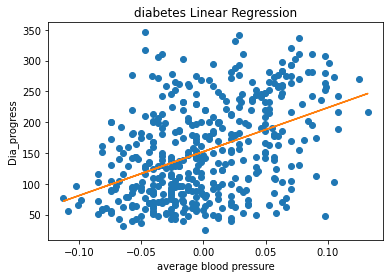

In [13]:
plt.plot(X_p,Y,'o')
plt.title('diabetes Linear Regression')
plt.xlabel('average blood pressure')
plt.ylabel('Dia_progress')
plt.plot(X_p,f(a,b,X_p))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X_p.reshape(-1,1)
X_p = X_p.reshape(-1,1)

In [16]:
model=LinearRegression()
model.fit(X_p,Y)

LinearRegression()

In [17]:
print('coefficiet=', model.coef_)
print('intercept=', model.intercept_)

coefficiet= [714.7416437]
intercept= 152.13348416289585


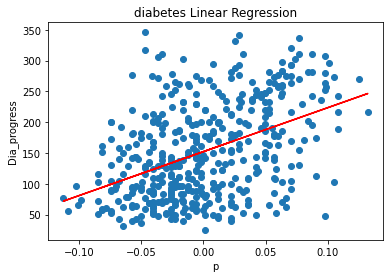

In [18]:
plt.plot(X_p,Y,'o')
plt.title('diabetes Linear Regression')
plt.xlabel('p')
plt.ylabel('Dia_progress')
plt.plot(X_p, model.predict(X_p),color='red')